# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
data.head()
male_df =  data[data['Gender'] == 'Male'] #Revisit pandas section for slicing data frames.  
female_df =  data[data['Gender'] == 'Female'] #Revisit pandas section for slicing data frames. 

height_mean = male_df['Height'].mean(),female_df['Height'].mean() #Arithmetic Mean: Sum of values/Count of Values/Occurrences
height_std = male_df['Height'].std(),female_df['Height'].std() #Standard Deviation: Summation of: ((Value-Mean)^2)/Count of Values
weight_mean = male_df['Weight'].mean(),female_df['Weight'].mean()
weight_std = male_df['Weight'].std(),female_df['Weight'].std()

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206)581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

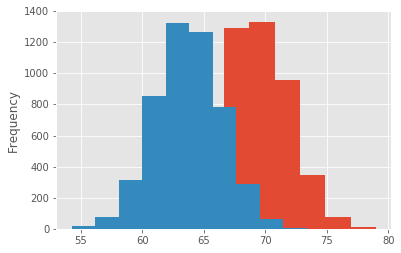

In [3]:
male_df['Height'].plot(kind='hist') #Adjust Opacity here
female_df['Height'].plot(kind='hist') #Adjust Opacity here

In [4]:
# Record your observations - are these inline with your personal observations?   
density(male_df['Height'])

NameError: name 'density' is not defined

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

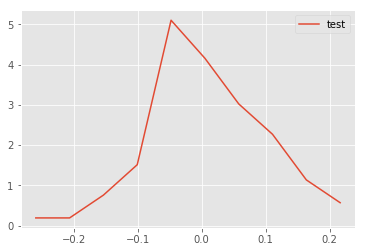

In [5]:
def density(x):
    occurrences, bins = np.histogram(x, 10, density=1)
    #Initializing empty arrays for storing values
    pdfx = np.zeros(occurrences.size)
    pdfy = np.zeros(occurrences.size)
    
    for k in range(occurrences.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1]) #Finding Midpoint between bins
        pdfy[k] = occurrences[k]
    
    return pdfx, pdfy

#Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

C:\Users\Jthom\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Jthom\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


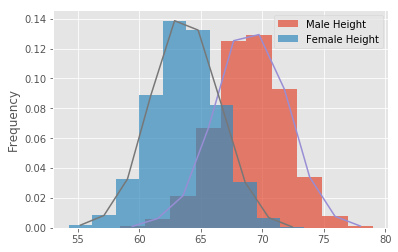

In [16]:
# You code here
# male_df['Height'].plot(kind='hist', alpha=0.7, label='Male Height') #Adjust Opacity here
# female_df['Height'].plot(kind='hist', alpha=0.7, label='Female Height') #Adjust Opacity here

# x,y = density(male_df['Height'])
# plt.plot(x,y)
# fx,fy = density(female_df['Height'])
# plt.plot(fx,fy)
# plt.show()

#Could not get PDF to display over histogram. Need to look into documentation further to see why...

male_df.Height.plot.hist(bins = 10, normed = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = 10, normed = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

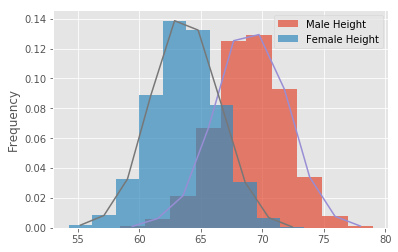

#### Repeat above exerice for male and female weights

C:\Users\Jthom\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Jthom\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


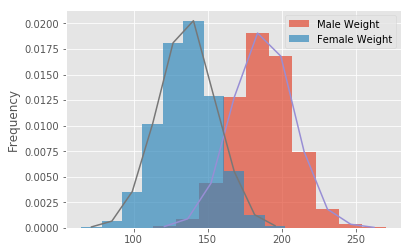

In [17]:
# Your code here
male_df.Weight.plot.hist(bins = 10, normed = True,  alpha = 0.7, label ="Male Weight");
female_df.Weight.plot.hist(bins = 10, normed = True, alpha = 0.7, label = 'Female Weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

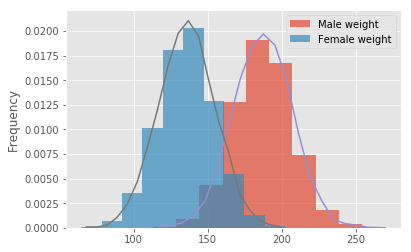

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 
# Males generally weigh more than females
# Females have slightly higher density in the middle of their set compared to Males
# 


#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\Jthom\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


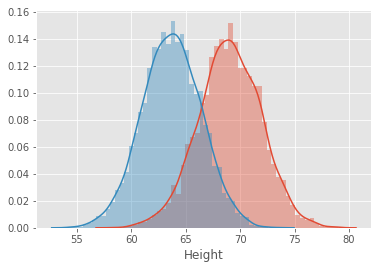

In [20]:
import seaborn as sns

sns.distplot(male_df['Height'],hist=True)
sns.distplot(female_df['Height'],hist=True)

Text(0.5,1,'Comparing weights')

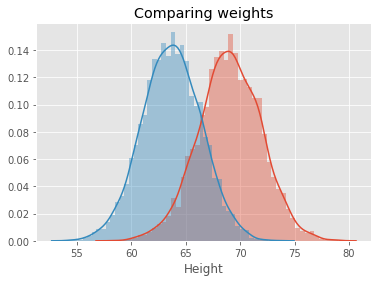

C:\Users\Jthom\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


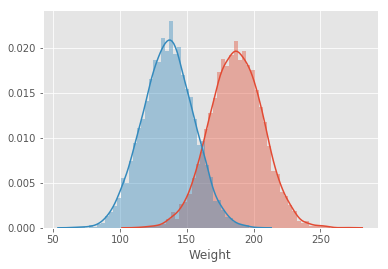

In [22]:
sns.distplot(male_df['Weight'],hist=True)
sns.distplot(female_df['Weight'],hist=True)

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

#PDF of Seaborn seems a bit more smooth compared to the previous plot #Amount of error in estimation will be different...
#PDF and Histogram's are plotted automagically instead of having to manually compute them both.

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.